In [1]:
from keras.api import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import visualkeras

In [17]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[:10_000]
y_train = y_train[:10_000]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2880)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               368768    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

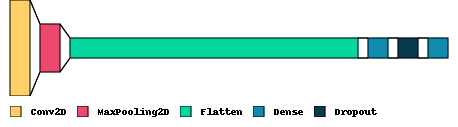

In [18]:
model = keras.models.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28, 1)),
  keras.layers.Conv2D(
    filters=20,
    kernel_size=(5, 5),
    activation=tensorflow.nn.relu,
  ),
  keras.layers.MaxPool2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10),
])
model.summary()
visualkeras.layered_view(model, draw_volume=False, legend=True)

In [19]:
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [20]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
313/313 [==============================] - 4s 12ms/step - loss: 0.4389 - accuracy: 0.8725
Epoch 2/5
313/313 [==============================] - 4s 12ms/step - loss: 0.1539 - accuracy: 0.9533
Epoch 3/5
313/313 [==============================] - 4s 11ms/step - loss: 0.1001 - accuracy: 0.9711
Epoch 4/5
313/313 [==============================] - 4s 11ms/step - loss: 0.0657 - accuracy: 0.9811
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0497 - accuracy: 0.9857


In [21]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0623 - accuracy: 0.9798 - 2s/epoch - 6ms/step


[0.06227230653166771, 0.9797999858856201]

In [22]:
probability_model = keras.Sequential([
    model, keras.layers.Softmax()
])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


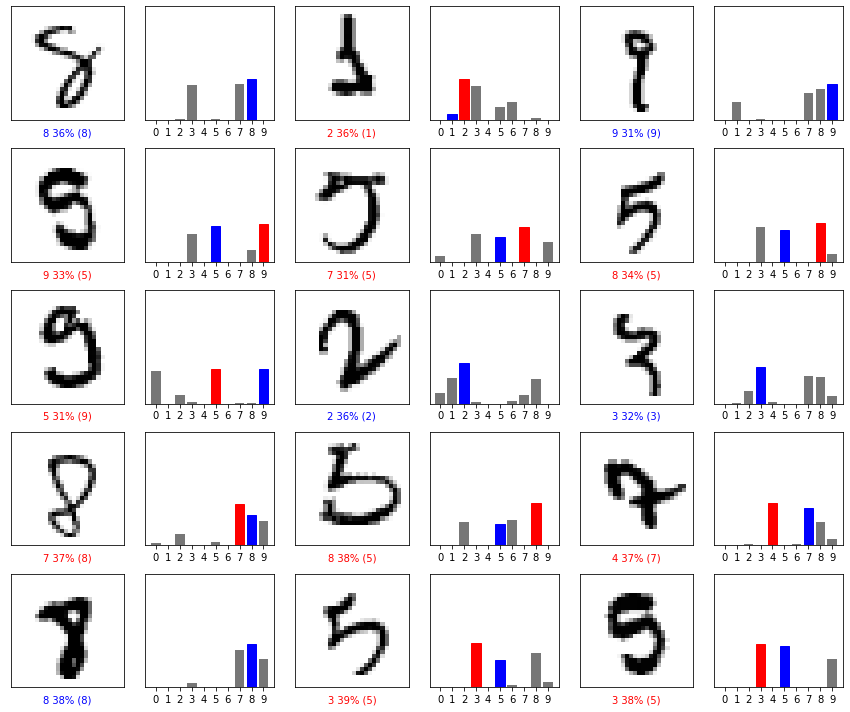

In [23]:
from tf_keras import plot_image, plot_value_array

# Plot the first num_rows*num_cols test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

N = num_cols * num_rows
worst_rank = np.argpartition(np.max(predictions, axis=1), N)[:N]
worst_predictions = predictions[worst_rank]
worst_x = x_test[worst_rank]
worst_y = y_test[worst_rank]

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, worst_predictions[i], worst_y[i], worst_x[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, worst_predictions[i], worst_y[i])

plt.tight_layout()
plt.show()